In [0]:
import pandas as pd
import numpy as np

from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

import nltk

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
stop_words = stopwords.words('english') + list(punctuation)

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

In [11]:
df = pd.read_csv('news.csv')
df.head()

,id,headline,text
0,uid-1,Market Advances 5.12 More,NEW YORK (AP) - A prime rate reduction by New ...
1,uid-2,District Boosts Request For Anti-Terrorism Aid...,Mayor Anthony A. Williams petitioned the White...
2,uid-3,"Election? Here's How You Do It, Mate.",From our downunder perspective here in Austral...
3,uid-4,The Biggest Boom Ever,We are about to rewrite history. Unless a rece...
4,uid-5,Economic Aide Sees Uptrend,"Sedate and scholarly Dr. Arthur Burns, the ex-..."


In [12]:
# tokenized all the text and removed punctuations
df['text'].apply(lambda x: tokenize(x))

0       [new, york, ap, prime, rate, reduction, new, y...
1       [mayor, anthony, a., williams, petitioned, whi...
2       [downunder, perspective, australia, united, st...
3       [rewrite, history, unless, recession, begins, ...
4       [sedate, scholarly, dr., arthur, burns, ex-col...
5       [statistics, enormous, costs, employee, drug, ...
6       [global, markets, ended, third, quarter, much,...
7       [consumer, borrowing, surged, july, mainly, re...
8       [washington, --, unexpected, decline, septembe...
9       [--, --, --, --, --, --, --, --, --, --, --, -...
10      [price, america, online, inc., 's, stock, surg...
11      [david, m., kennedy, next, secretary, u.s., tr...
12      [new, york, nov., 12���presi-de'nt, bush, poli...
13      [washington, --, general, motors, corp., chair...
14      [one, big, problems, us, life, never, get, rea...
15      [business, productivity, second, quarter, dete...
16      [washington, nice, place, visit, glad, 're, li...
17      [presi

In [13]:
vocab = set()
for i in range(len(df['text'])):
    words = tokenize(df['text'][i])
    vocab.update(words)
    
vocab = list(vocab)
word_index = {w: idx for idx, w in enumerate(vocab)}

VOCABULARY_SIZE = len(vocab)
DOCUMENTS_COUNT = len(df['text'])
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

39542 3000


In [14]:
word_index

{'ends.': 0,
 'dogged': 1,
 'neo-prep': 2,
 'packaged': 3,
 'skiff': 4,
 '���opportunity': 5,
 'year.': 6,
 'supply-side': 7,
 'praise': 8,
 'hro-led': 9,
 'oft-repealed': 10,
 'fungicide': 11,
 'soybean': 12,
 'productive': 13,
 'payment': 14,
 'intimidating': 15,
 '41.4': 16,
 'brochure': 17,
 'plummeted.': 18,
 'imposing': 19,
 'cul': 20,
 'policy-makers': 21,
 'realized': 22,
 'trizetto.': 23,
 'carps': 24,
 'obsequious': 25,
 'surge-and': 26,
 'nemer.': 27,
 '179-nation': 28,
 'boss.�\u06dd': 29,
 '���blippers': 30,
 'deserted': 31,
 'harvest': 32,
 '3,298,000': 33,
 'tradi-': 34,
 'processed': 35,
 'elbows': 36,
 'mega-mergers': 37,
 'action���and': 38,
 'hoffa': 39,
 'uneasy': 40,
 '1974���as': 41,
 'autumn': 42,
 'pets': 43,
 'babbage': 44,
 '.nit': 45,
 'result.': 46,
 'prickly': 47,
 'smaller-than-a-breadbox': 48,
 'stephen': 49,
 'abbey': 50,
 'engler': 51,
 '29.35': 52,
 'hickman': 53,
 'mandating': 54,
 'corresponded': 55,
 'launching': 56,
 'usda': 57,
 'juice': 58,
 'dov

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocab)

# Fit the TfIdf model
X = tfidf.fit_transform(df['text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
y = X.toarray()

In [17]:
train

NameError: ignored

In [18]:
df2.head()

NameError: ignored

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(y)

kmeans.cluster_centers_

array([[-1.35525272e-19, -3.25260652e-19, -7.45388994e-20, ...,
         3.79470760e-19, -1.42301535e-19, -2.03287907e-20],
       [ 3.25260652e-19, -6.77626358e-19,  1.76182853e-19, ...,
        -1.35525272e-19,  1.35525272e-20, -1.76182853e-19],
       [ 7.31836466e-19,  3.27415684e-04,  1.38167848e-04, ...,
         9.62229428e-19, -6.23416249e-19,  2.71050543e-20],
       ...,
       [ 1.03287725e-04,  9.59993372e-05,  5.14996032e-19, ...,
         2.90770162e-04, -7.25060203e-19,  3.65918233e-19],
       [ 1.21972744e-19,  2.43945489e-19, -6.09863722e-20, ...,
         0.00000000e+00, -7.45388994e-20, -1.08420217e-19],
       [ 4.60785923e-19,  3.57501025e-04,  2.77826807e-19, ...,
        -5.42101086e-20, -2.03287907e-19, -3.59141970e-19]])

In [20]:
kmeans.labels_

array([7, 2, 2, ..., 5, 0, 5], dtype=int32)

In [0]:
z = kmeans.predict(y)

In [22]:
z

array([7, 2, 2, ..., 5, 0, 5], dtype=int32)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.metrics import silhouette_score

print(silhouette_score(y, z))

0.005108142224556619


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=)
pca_result = pca.fit_transform(y)

In [0]:
print(pca_result)

[[ 2.36589523e-01 -8.54386025e-02  3.84836605e-02 ...  1.18173341e-02
  -7.00664809e-03 -1.88663246e-02]
 [-6.12205250e-02 -7.84312336e-02 -1.10469137e-04 ... -1.42354566e-02
   1.50401516e-02 -5.52101402e-02]
 [-7.19806063e-02 -8.82598492e-02 -2.32343459e-02 ...  2.48751710e-02
   2.65699944e-02  9.36983636e-03]
 ...
 [-3.28742480e-02 -6.09589623e-02 -1.51927854e-02 ...  4.40239669e-02
   4.81703387e-03  1.58569511e-02]
 [-2.07879162e-02  5.98982230e-02  1.70632667e-02 ... -7.72615687e-03
   5.15538560e-02 -2.76975315e-02]
 [ 4.46690925e-03 -2.32822714e-02  3.07707076e-02 ...  1.52007705e-04
   1.64494809e-03  1.55842233e-02]]


In [0]:
pca_result[:, 0]

array([ 0.23662416, -0.06120635, -0.07197518, ..., -0.03286923,
       -0.02076393,  0.00446816])

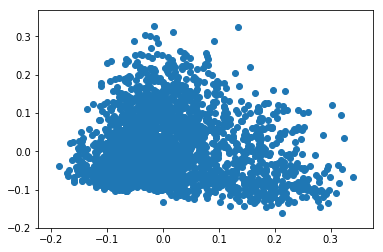

In [0]:
import matplotlib.pyplot as plt
plt.scatter(pca_result[:, 0], pca_result[:, 1])

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_result)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(silhouette_score(y, kmeans.labels_))

[[-4.84747988e-02 -4.09718503e-02 -2.42588887e-04 -4.08273586e-03
  -4.31368446e-03 -4.85640990e-03 -3.39667829e-03 -1.42643228e-06
   1.85810066e-03 -4.39549454e-03 -1.29941766e-03  3.23466272e-03
   1.88515628e-03 -1.45888329e-03  2.25150388e-03 -6.50670611e-04
   2.34986211e-03  6.82718742e-04  8.53329637e-04  1.44188704e-03
  -1.07669865e-03 -6.87039220e-04 -1.30253084e-03 -1.04830026e-03
  -1.38683744e-03  8.64131240e-04  1.88615662e-03 -4.18724131e-04
   4.60206267e-05  1.97559018e-04  4.15891370e-04  4.71178302e-04
  -8.67127103e-04  2.00689816e-04  1.87298614e-04  7.78705314e-04
  -1.30029899e-03 -4.45883449e-04 -3.21846729e-04  7.42969793e-04
   1.05691350e-04 -5.44053765e-05 -7.99641568e-04 -3.75024089e-04
  -3.73263766e-05  2.55652772e-04 -2.69785196e-04 -3.26965083e-04
  -1.62934504e-04 -5.95946779e-04 -1.56597883e-04  3.01794928e-04
  -5.14860928e-04  3.88512610e-04  3.68849541e-04  4.01288147e-04
   7.12709478e-04  1.25094265e-04  6.68151178e-05  1.07545047e-04
  -1.31023

0.003525575168112612


In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [0]:
fig = plt.figure()
ax = Axes3D(fig)